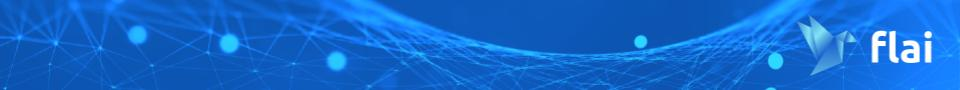

# **Aula 2 - Análise Exploratória de dados com PySpark**

No momento da gravação desta aula, o Brasil passa por um aumento significativo de preços, inclusive do GLP - Gás Liquefeito de Petróleo, distribuído para a população em botijões de 13Kg 🚡, e que é popularmanete conhecido como Gás de Cozinha ou Botijão de Gás. Em sua grande maioria são acoplados em fogões e utilizados como combustíveis 🔥, principalmente para cozinhar alimentos 🍲. Portanto, é um item de extrema importância para toda população Brasileira e que entender a distribuição de preços nas mais diversas regiões e unidades da federação do país se faz extremamente necessário. Nesta aula vamos utilizar os dados resultantes de uma pesquisa conduzida no mês de dezembro de 2021 pela ANP e divulgada no portal de dados abertos do Governo Federal do Brasil 🇧🇷. 

## **Preparando o ambiente para utilizar o PySpark**

### **Instalando o Java**

O Apache Spark depende de outros sistemas, portanto, antes do Spark é preciso instalar as dependências. Primeiro, deve-se instalar o java

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

### **Instalando o Apache Spark**

Em seguida, é preciso fazer o download do Spark, e, também, do hadoop, pois o Apache Spark roda sob o HDFS, em sua máquina (no caso aqui, na máquina virtual do Google Colab que você está usando.

In [ ]:
# Fazendo download
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz

# Descompactando os arquivos
!tar xf spark-3.1.2-bin-hadoop2.7.tgz

### **Configurando o ambiente**

Pronto! Agora precisamos dizer para o sistema onde encontrar o Java e o Spark, que instalamos a pouco neste ambiente.

In [ ]:
# Importando a biblioteca os
import os

# Definindo a variável de ambiente do Java
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

# Definindo a variável de ambiente do Spark
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

A seguir, vamos precisar da biblioteca findspark que vai nos permitir importar pacotes necessários para o funcionamento do pyspark



In [ ]:
# instalando a findspark
!pip install -q findspark

In [ ]:
#importando a findspark
import findspark

# iniciando o findspark
findspark.init()

## **Iniciando o PySpark**

Tudo certo até aqui? Ótimo, então agora vamos abrir um sessão Spark para poder trabalhar com este FrameWork.

In [ ]:
# importando o pacote necessário
from pyspark.sql import SparkSession

In [ ]:
# iniciando o spark context
sc = SparkSession.builder.master('local[*]').getOrCreate()

# Verificando se a sessão foi criada
sc

## **Ingestão dos dados para o Apache Spark**

In [ ]:
# download de um conjunto de dados aberto
# fonte: https://dados.gov.br/dataset/serie-historica-de-precos-de-combustiveis-por-revenda
!wget --verbose --show-progress --no-check-certificate https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/dados-abertos-precos-2021-12-glp.csv

--2022-10-06 22:31:34--  https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/dados-abertos-precos-2021-12-glp.csv
Resolving www.gov.br (www.gov.br)... 161.148.164.31
Connecting to www.gov.br (www.gov.br)|161.148.164.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2623526 (2.5M) [text/csv]
Saving to: ‘dados-abertos-precos-2021-12-glp.csv’

dados-abertos-preco 100%[===================>]   2.50M   445KB/s    in 8.6s    

2022-10-06 22:31:43 (299 KB/s) - ‘dados-abertos-precos-2021-12-glp.csv’ saved [2623526/2623526]



In [74]:
 # carregando um conjunto de dados que baixamos da internet
precogas = sc.read.csv("/content/dados-abertos-precos-2021-12-glp.csv", 
                       inferSchema=True, header=True,
                       sep = ';', 
                       #encoding = "ISO-8859-1")
                       encoding = "UTF-8")

In [75]:
# Espiando o dataset
precogas.show()

+--------------+--------------+------------+--------------------+-------------------+--------------------+----------+----------------+-----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+
|Regiao - Sigla|Estado - Sigla|   Municipio|             Revenda|    CNPJ da Revenda|         Nome da Rua|Numero Rua|     Complemento|           Bairro|      Cep|Produto|Data da Coleta|Valor de Venda|Valor de Compra|Unidade de Medida|            Bandeira|
+--------------+--------------+------------+--------------------+-------------------+--------------------+----------+----------------+-----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+
|            SE|            SP| SAO VICENTE|CONSIGAZ DISTRIBU...| 01.597.589/0003-81| RUA MANOEL DE ABREU|       790|      QUADRA 108|   CIDADE NAUTICA|11355-400|    GLP|    01/12/2021|         97,99|           null|       R$ / 13 k

## **Conhecendo a estrutura do seu SparkDataFrame**

In [ ]:
# Importações necessárias
from pyspark import *
from pyspark.sql import *

In [72]:
# Verificando o tipo de objeto criado
type(precogas)

pyspark.sql.dataframe.DataFrame

In [76]:
# Verificando o schema() deste sparkdataframe
precogas.printSchema()

root
 |-- Regiao - Sigla: string (nullable = true)
 |-- Estado - Sigla: string (nullable = true)
 |-- Municipio: string (nullable = true)
 |-- Revenda: string (nullable = true)
 |-- CNPJ da Revenda: string (nullable = true)
 |-- Nome da Rua: string (nullable = true)
 |-- Numero Rua: string (nullable = true)
 |-- Complemento: string (nullable = true)
 |-- Bairro: string (nullable = true)
 |-- Cep: string (nullable = true)
 |-- Produto: string (nullable = true)
 |-- Data da Coleta: string (nullable = true)
 |-- Valor de Venda: string (nullable = true)
 |-- Valor de Compra: string (nullable = true)
 |-- Unidade de Medida: string (nullable = true)
 |-- Bandeira: string (nullable = true)



In [ ]:
# Contando o número de linhas do dataset
precogas.count()

15765

In [ ]:
# Listando as colunas do dataset
precogas.columns

['Regiao - Sigla',
 'Estado - Sigla',
 'Municipio',
 'Revenda',
 'CNPJ da Revenda',
 'Nome da Rua',
 'Numero Rua',
 'Complemento',
 'Bairro',
 'Cep',
 'Produto',
 'Data da Coleta',
 'Valor de Venda',
 'Valor de Compra',
 'Unidade de Medida',
 'Bandeira']

In [ ]:
# Contando o número de colunas do dataset
len(precogas.columns)

16

In [ ]:
# Método para verificar o tipo dos atributos do dataset
precogas.dtypes

[('Regiao - Sigla', 'string'),
 ('Estado - Sigla', 'string'),
 ('Municipio', 'string'),
 ('Revenda', 'string'),
 ('CNPJ da Revenda', 'string'),
 ('Nome da Rua', 'string'),
 ('Numero Rua', 'string'),
 ('Complemento', 'string'),
 ('Bairro', 'string'),
 ('Cep', 'string'),
 ('Produto', 'string'),
 ('Data da Coleta', 'string'),
 ('Valor de Venda', 'string'),
 ('Valor de Compra', 'string'),
 ('Unidade de Medida', 'string'),
 ('Bandeira', 'string')]

## **Manipulação de colunas de um SparkDataFrame**

In [ ]:
# importando os métodos com funções para transformações de variáveis
from pyspark.sql.functions import *

In [ ]:
# Selecionando somente algumas colunas do dataset
precogas.select('Revenda','Bandeira','Data da Coleta','Valor de Venda').show(20)

+--------------------+--------------------+--------------+--------------+
|             Revenda|            Bandeira|Data da Coleta|Valor de Venda|
+--------------------+--------------------+--------------+--------------+
|CONSIGAZ DISTRIBU...|            CONSIGAZ|    01/12/2021|         97,99|
|AUTO POSTO AMAPA ...|               FOGAS|    01/12/2021|           115|
|AUTO POSTO ACAUAN...|           AMAZONGÁS|    01/12/2021|           110|
|AUTO POSTO CANIND...|           AMAZONGÁS|    01/12/2021|           115|
|AUTO POSTO AEROPO...|           AMAZONGÁS|    01/12/2021|           115|
|SOUSA & ALVES COM...|SUPERGASBRAS ENERGIA|    01/12/2021|         99,99|
|MARLIM COMBUSTIVE...|            LIQUIGÁS|    01/12/2021|         98,99|
|AUTO SHOPPING DER...|            ULTRAGAZ|    01/12/2021|         98,99|
|LR COMERCIO DE PR...|              BRANCA|    01/12/2021|         99,99|
|CASCOL COMBUSTIVE...|            ULTRAGAZ|    01/12/2021|         99,99|
|CASCOL COMBUSTIVE...|            LIQU

In [ ]:
# Outra forma de Selecionar somente algumas colunas do dataset
precogas.select('Revenda','Bandeira',col('Data da Coleta').alias('Data_da_Coleta'),'Valor de Venda').show(20)

+--------------------+--------------------+--------------+--------------+
|             Revenda|            Bandeira|Data_da_Coleta|Valor de Venda|
+--------------------+--------------------+--------------+--------------+
|CONSIGAZ DISTRIBU...|            CONSIGAZ|    01/12/2021|         97,99|
|AUTO POSTO AMAPA ...|               FOGAS|    01/12/2021|           115|
|AUTO POSTO ACAUAN...|           AMAZONGÁS|    01/12/2021|           110|
|AUTO POSTO CANIND...|           AMAZONGÁS|    01/12/2021|           115|
|AUTO POSTO AEROPO...|           AMAZONGÁS|    01/12/2021|           115|
|SOUSA & ALVES COM...|SUPERGASBRAS ENERGIA|    01/12/2021|         99,99|
|MARLIM COMBUSTIVE...|            LIQUIGÁS|    01/12/2021|         98,99|
|AUTO SHOPPING DER...|            ULTRAGAZ|    01/12/2021|         98,99|
|LR COMERCIO DE PR...|              BRANCA|    01/12/2021|         99,99|
|CASCOL COMBUSTIVE...|            ULTRAGAZ|    01/12/2021|         99,99|
|CASCOL COMBUSTIVE...|            LIQU

In [ ]:
# Outra forma de declarar uma coluna de um dataset
# Isso vai ser ser util mais na frente
precogas.select(precogas.Revenda.alias('Revendedora'),precogas.Bandeira).show()

+--------------------+--------------------+
|         Revendedora|            Bandeira|
+--------------------+--------------------+
|CONSIGAZ DISTRIBU...|            CONSIGAZ|
|AUTO POSTO AMAPA ...|               FOGAS|
|AUTO POSTO ACAUAN...|           AMAZONGÁS|
|AUTO POSTO CANIND...|           AMAZONGÁS|
|AUTO POSTO AEROPO...|           AMAZONGÁS|
|SOUSA & ALVES COM...|SUPERGASBRAS ENERGIA|
|MARLIM COMBUSTIVE...|            LIQUIGÁS|
|AUTO SHOPPING DER...|            ULTRAGAZ|
|LR COMERCIO DE PR...|              BRANCA|
|CASCOL COMBUSTIVE...|            ULTRAGAZ|
|CASCOL COMBUSTIVE...|            LIQUIGÁS|
|CASCOL COMBUSTIVE...|            ULTRAGAZ|
|POSTO DOS PODERES...|SUPERGASBRAS ENERGIA|
|RIBEIRO DE MENDON...|             COPAGAZ|
|AUTO POSTO MALIBU...|            LIQUIGÁS|
| POSTO ROUXINOL LTDA|             COPAGAZ|
|GABIATTI & GABIAT...|            LIQUIGÁS|
|AUTO POSTO GK EIRELI| NACIONAL GÁS BUTANO|
|GP PETROLEO COMER...|SUPERGASBRAS ENERGIA|
|IRMAOS TEIXEIRA LTDA|          

In [ ]:
# Criando uma nova coluna deixando o atributo Bandeira em minúsculo
precogas.withColumn(colName = "teste", col = lower('Bandeira')).show()

+--------------+--------------+------------+--------------------+-------------------+--------------------+----------+----------------+-----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+--------------------+
|Regiao - Sigla|Estado - Sigla|   Municipio|             Revenda|    CNPJ da Revenda|         Nome da Rua|Numero Rua|     Complemento|           Bairro|      Cep|Produto|Data da Coleta|Valor de Venda|Valor de Compra|Unidade de Medida|            Bandeira|               teste|
+--------------+--------------+------------+--------------------+-------------------+--------------------+----------+----------------+-----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+--------------------+
|            SE|            SP| SAO VICENTE|CONSIGAZ DISTRIBU...| 01.597.589/0003-81| RUA MANOEL DE ABREU|       790|      QUADRA 108|   CIDADE NAUTICA|11355-400|    GLP

In [ ]:
# Criando uma nova coluna somente replicando o atributo bandeira
precogas.withColumn("teste", precogas.Bandeira).show()

+--------------+--------------+------------+--------------------+-------------------+--------------------+----------+----------------+-----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+--------------------+
|Regiao - Sigla|Estado - Sigla|   Municipio|             Revenda|    CNPJ da Revenda|         Nome da Rua|Numero Rua|     Complemento|           Bairro|      Cep|Produto|Data da Coleta|Valor de Venda|Valor de Compra|Unidade de Medida|            Bandeira|               teste|
+--------------+--------------+------------+--------------------+-------------------+--------------------+----------+----------------+-----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+--------------------+
|            SE|            SP| SAO VICENTE|CONSIGAZ DISTRIBU...| 01.597.589/0003-81| RUA MANOEL DE ABREU|       790|      QUADRA 108|   CIDADE NAUTICA|11355-400|    GLP

In [ ]:
# substituindo Caracteres especifico de uma variavel
# E persistindo o resultado na mesma coluna
precogas.withColumn(
    colName = 'Data da Coleta', 
    col = regexp_replace('Data da Coleta','/','-')
    ).show()

+--------------+--------------+------------+--------------------+-------------------+--------------------+----------+----------------+-----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+
|Regiao - Sigla|Estado - Sigla|   Municipio|             Revenda|    CNPJ da Revenda|         Nome da Rua|Numero Rua|     Complemento|           Bairro|      Cep|Produto|Data da Coleta|Valor de Venda|Valor de Compra|Unidade de Medida|            Bandeira|
+--------------+--------------+------------+--------------------+-------------------+--------------------+----------+----------------+-----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+
|            SE|            SP| SAO VICENTE|CONSIGAZ DISTRIBU...| 01.597.589/0003-81| RUA MANOEL DE ABREU|       790|      QUADRA 108|   CIDADE NAUTICA|11355-400|    GLP|    01-12-2021|         97,99|           null|       R$ / 13 k

In [ ]:
# substituindo valores de uma variavel com o metodo replace
precogas.replace( 
  to_replace = 'GLP',
  value = 'GAS DE COZINHA', 
  subset = 'produto').show()

+--------------+--------------+------------+--------------------+-------------------+--------------------+----------+----------------+-----------------+---------+--------------+--------------+--------------+---------------+-----------------+--------------------+
|Regiao - Sigla|Estado - Sigla|   Municipio|             Revenda|    CNPJ da Revenda|         Nome da Rua|Numero Rua|     Complemento|           Bairro|      Cep|       Produto|Data da Coleta|Valor de Venda|Valor de Compra|Unidade de Medida|            Bandeira|
+--------------+--------------+------------+--------------------+-------------------+--------------------+----------+----------------+-----------------+---------+--------------+--------------+--------------+---------------+-----------------+--------------------+
|            SE|            SP| SAO VICENTE|CONSIGAZ DISTRIBU...| 01.597.589/0003-81| RUA MANOEL DE ABREU|       790|      QUADRA 108|   CIDADE NAUTICA|11355-400|GAS DE COZINHA|    01/12/2021|         97,99|    

In [ ]:
# Renomeando colunas
precogas.withColumnRenamed(existing = 'Estado - Sigla', new = 'Estado').show()

+--------------+------+------------+--------------------+-------------------+--------------------+----------+----------------+-----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+
|Regiao - Sigla|Estado|   Municipio|             Revenda|    CNPJ da Revenda|         Nome da Rua|Numero Rua|     Complemento|           Bairro|      Cep|Produto|Data da Coleta|Valor de Venda|Valor de Compra|Unidade de Medida|            Bandeira|
+--------------+------+------------+--------------------+-------------------+--------------------+----------+----------------+-----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+
|            SE|    SP| SAO VICENTE|CONSIGAZ DISTRIBU...| 01.597.589/0003-81| RUA MANOEL DE ABREU|       790|      QUADRA 108|   CIDADE NAUTICA|11355-400|    GLP|    01/12/2021|         97,99|           null|       R$ / 13 kg|            CONSIGAZ|
|       

In [ ]:
# Apagando Colunas do SparkDataFrame
precogas.drop('Municipio','Revenda').show()

+--------------+--------------+-------------------+--------------------+----------+----------------+-----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+
|Regiao - Sigla|Estado - Sigla|    CNPJ da Revenda|         Nome da Rua|Numero Rua|     Complemento|           Bairro|      Cep|Produto|Data da Coleta|Valor de Venda|Valor de Compra|Unidade de Medida|            Bandeira|
+--------------+--------------+-------------------+--------------------+----------+----------------+-----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+
|            SE|            SP| 01.597.589/0003-81| RUA MANOEL DE ABREU|       790|      QUADRA 108|   CIDADE NAUTICA|11355-400|    GLP|    01/12/2021|         97,99|           null|       R$ / 13 kg|            CONSIGAZ|
|             N|            AC| 00.529.581/0001-53|    VIA CHICO MENDES|      3570|            null|            

## **Transformações úteis para um Cientista de Dados**

In [ ]:
# Verificando os tipos das variáveis
precogas.printSchema()

root
 |-- Regiao - Sigla: string (nullable = true)
 |-- Estado - Sigla: string (nullable = true)
 |-- Municipio: string (nullable = true)
 |-- Revenda: string (nullable = true)
 |-- CNPJ da Revenda: string (nullable = true)
 |-- Nome da Rua: string (nullable = true)
 |-- Numero Rua: string (nullable = true)
 |-- Complemento: string (nullable = true)
 |-- Bairro: string (nullable = true)
 |-- Cep: string (nullable = true)
 |-- Produto: string (nullable = true)
 |-- Data da Coleta: string (nullable = true)
 |-- Valor de Venda: string (nullable = true)
 |-- Valor de Compra: string (nullable = true)
 |-- Unidade de Medida: string (nullable = true)
 |-- Bandeira: string (nullable = true)



### **Corrigindo tipos de variáveis de um SparkDataFrame**

In [ ]:
# Substituindo '/' por '-' e alterando para a variavel para o formato date
precogas = precogas.withColumn(
    colName = 'Data da Coleta', 
    col = to_date(
            col = regexp_replace('Data da Coleta','/','-'),
            format = "dd-MM-yyyy"
          )
    )

# Inspecionando o resultado
precogas.select('Data da Coleta').printSchema()
precogas.show()

root
 |-- Data da Coleta: date (nullable = true)

+--------------+--------------+------------+--------------------+-------------------+--------------------+----------+----------------+-----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+
|Regiao - Sigla|Estado - Sigla|   Municipio|             Revenda|    CNPJ da Revenda|         Nome da Rua|Numero Rua|     Complemento|           Bairro|      Cep|Produto|Data da Coleta|Valor de Venda|Valor de Compra|Unidade de Medida|            Bandeira|
+--------------+--------------+------------+--------------------+-------------------+--------------------+----------+----------------+-----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+
|            SE|            SP| SAO VICENTE|CONSIGAZ DISTRIBU...| 01.597.589/0003-81| RUA MANOEL DE ABREU|       790|      QUADRA 108|   CIDADE NAUTICA|11355-400|    GLP|    2021-12-

In [ ]:
# Transformando o preco em numerica
precogas = precogas.withColumn(
    colName = 'Valor de Venda', 
    col = regexp_replace('Valor de Venda',',','.').cast('float')
    )

# Inspecionando o resultado
precogas.select('Valor de Venda').printSchema()
precogas.show()


root
 |-- Valor de Venda: float (nullable = true)

+--------------+--------------+------------+--------------------+-------------------+--------------------+----------+----------------+-----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+
|Regiao - Sigla|Estado - Sigla|   Municipio|             Revenda|    CNPJ da Revenda|         Nome da Rua|Numero Rua|     Complemento|           Bairro|      Cep|Produto|Data da Coleta|Valor de Venda|Valor de Compra|Unidade de Medida|            Bandeira|
+--------------+--------------+------------+--------------------+-------------------+--------------------+----------+----------------+-----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+
|            SE|            SP| SAO VICENTE|CONSIGAZ DISTRIBU...| 01.597.589/0003-81| RUA MANOEL DE ABREU|       790|      QUADRA 108|   CIDADE NAUTICA|11355-400|    GLP|    2021-12

### **Categorizando variáveis**

In [ ]:
# Substituindo '/' por '-' e alterando para a variavel para o formato date
precogas.withColumn(
    colName = 'Faixa_Preco', 
    col = (
        when(precogas['Valor de Venda']<100,' abaixo de R$100,00').
        when(((precogas['Valor de Venda']>=100) & 
            (precogas['Valor de Venda']<110)),'de R$100 a R$109,99').
       otherwise('R$110,00 ou mais')
    )
    ).show()

+--------------+--------------+------------+--------------------+-------------------+--------------------+----------+----------------+-----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+-------------------+
|Regiao - Sigla|Estado - Sigla|   Municipio|             Revenda|    CNPJ da Revenda|         Nome da Rua|Numero Rua|     Complemento|           Bairro|      Cep|Produto|Data da Coleta|Valor de Venda|Valor de Compra|Unidade de Medida|            Bandeira|        Faixa_Preco|
+--------------+--------------+------------+--------------------+-------------------+--------------------+----------+----------------+-----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+-------------------+
|            SE|            SP| SAO VICENTE|CONSIGAZ DISTRIBU...| 01.597.589/0003-81| RUA MANOEL DE ABREU|       790|      QUADRA 108|   CIDADE NAUTICA|11355-400|    GLP|  

### **Criando o atributo Ano de uma variável que contém Data**



In [ ]:
# Criando 
precogas.withColumn(
    colName = 'Ano', 
    col = (precogas['Data da Coleta'].substr(0, 4)  )
    ).show()

+--------------+--------------+------------+--------------------+-------------------+--------------------+----------+----------------+-----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+----+
|Regiao - Sigla|Estado - Sigla|   Municipio|             Revenda|    CNPJ da Revenda|         Nome da Rua|Numero Rua|     Complemento|           Bairro|      Cep|Produto|Data da Coleta|Valor de Venda|Valor de Compra|Unidade de Medida|            Bandeira| Ano|
+--------------+--------------+------------+--------------------+-------------------+--------------------+----------+----------------+-----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+----+
|            SE|            SP| SAO VICENTE|CONSIGAZ DISTRIBU...| 01.597.589/0003-81| RUA MANOEL DE ABREU|       790|      QUADRA 108|   CIDADE NAUTICA|11355-400|    GLP|    2021-12-01|         97.99|           null| 

## **Filtrando linhas de um SparkDataFrame**

In [ ]:
# Selecionando somente as cotações realizadas na cidade de Salvador
precogas.filter(precogas.Municipio == 'SALVADOR').show()

+--------------+--------------+---------+--------------------+-------------------+--------------------+----------+--------------------+--------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+
|Regiao - Sigla|Estado - Sigla|Municipio|             Revenda|    CNPJ da Revenda|         Nome da Rua|Numero Rua|         Complemento|        Bairro|      Cep|Produto|Data da Coleta|Valor de Venda|Valor de Compra|Unidade de Medida|            Bandeira|
+--------------+--------------+---------+--------------------+-------------------+--------------------+----------+--------------------+--------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+
|            NE|            BA| SALVADOR|NADIR DE ALMEIDA ...| 04.997.975/0001-97|    RUA DOS JESUITAS|        10|   QUADRA 02 LOTE 98|    DOM AVELAR|41315-160|    GLP|    2021-12-01|          94.0|           null|       R$ / 13 kg|SUPERG

In [ ]:
# Selecionando somente as cotações realizadas no ACRE OU na BAHIA
precogas.filter(
    (precogas['Estado - Sigla'] == 'AC') | 
    (precogas['Estado - Sigla'] == 'BA')
    ).show()

+--------------+--------------+------------+--------------------+-------------------+--------------------+----------+--------------------+----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+
|Regiao - Sigla|Estado - Sigla|   Municipio|             Revenda|    CNPJ da Revenda|         Nome da Rua|Numero Rua|         Complemento|          Bairro|      Cep|Produto|Data da Coleta|Valor de Venda|Valor de Compra|Unidade de Medida|            Bandeira|
+--------------+--------------+------------+--------------------+-------------------+--------------------+----------+--------------------+----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+
|             N|            AC|  RIO BRANCO|AUTO POSTO AMAPA ...| 00.529.581/0001-53|    VIA CHICO MENDES|      3570|                null|           AREAL|69906-119|    GLP|    2021-12-01|         115.0|           null|    

In [ ]:
# Selecionando somente as cotações no estado de São Paulo no dia 10/12/2021
precogas.filter(
    (col('Estado - Sigla') == 'SP') & 
    (col('Data da Coleta') == '10/12/2021')
    ).show()

+--------------+--------------+---------+-------+---------------+-----------+----------+-----------+------+---+-------+--------------+--------------+---------------+-----------------+--------+
|Regiao - Sigla|Estado - Sigla|Municipio|Revenda|CNPJ da Revenda|Nome da Rua|Numero Rua|Complemento|Bairro|Cep|Produto|Data da Coleta|Valor de Venda|Valor de Compra|Unidade de Medida|Bandeira|
+--------------+--------------+---------+-------+---------------+-----------+----------+-----------+------+---+-------+--------------+--------------+---------------+-----------------+--------+
+--------------+--------------+---------+-------+---------------+-----------+----------+-----------+------+---+-------+--------------+--------------+---------------+-----------------+--------+



In [79]:
# Selecionando somente as cotações no estado da Bahia com preço abaixo de R$80
precogas.filter(
    (precogas['Estado - Sigla'] == 'BA') & 
    (precogas['Valor de Venda'] >120)
    ).show()

+--------------+--------------+---------+-------+---------------+-----------+----------+-----------+------+---+-------+--------------+--------------+---------------+-----------------+--------+
|Regiao - Sigla|Estado - Sigla|Municipio|Revenda|CNPJ da Revenda|Nome da Rua|Numero Rua|Complemento|Bairro|Cep|Produto|Data da Coleta|Valor de Venda|Valor de Compra|Unidade de Medida|Bandeira|
+--------------+--------------+---------+-------+---------------+-----------+----------+-----------+------+---+-------+--------------+--------------+---------------+-----------------+--------+
+--------------+--------------+---------+-------+---------------+-----------+----------+-----------+------+---+-------+--------------+--------------+---------------+-----------------+--------+



In [ ]:
# Filtrando linhas com where
precogas.where(
    (col('Estado - Sigla') == 'BA') & 
    (col('Valor de Venda') < 85)
    ).show()

+--------------+--------------+----------------+--------------------+-------------------+--------------------+----------+------------------+--------------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+
|Regiao - Sigla|Estado - Sigla|       Municipio|             Revenda|    CNPJ da Revenda|         Nome da Rua|Numero Rua|       Complemento|              Bairro|      Cep|Produto|Data da Coleta|Valor de Venda|Valor de Compra|Unidade de Medida|            Bandeira|
+--------------+--------------+----------------+--------------------+-------------------+--------------------+----------+------------------+--------------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+
|            NE|            BA|        SALVADOR|CRISPIM SOUZA COM...| 05.092.369/0001-95|RUA FILADELFO CAR...|       S/N|LOT. JARDIM PIRAJÁ|        ÁGUAS CLARAS|41310-240|    GLP|    2021-12-01|         84

## **Medidas resumos de variáveis numéricas de um SparkDataFrame**

In [ ]:
# Resumindo variáveis numéricas
precogas.select('Valor de Venda').describe().show()

+-------+------------------+
|summary|    Valor de Venda|
+-------+------------------+
|  count|             15765|
|   mean|103.29313201371957|
| stddev| 8.951108633678142|
|    min|             77.99|
|    max|             140.0|
+-------+------------------+



In [ ]:
# Resumindo variáveis numéricas com summary
precogas.select('Valor de Venda').summary().show()

+-------+------------------+
|summary|    Valor de Venda|
+-------+------------------+
|  count|             15765|
|   mean|103.29313201371957|
| stddev| 8.951108633678142|
|    min|             77.99|
|    25%|             97.99|
|    50%|             102.0|
|    75%|             110.0|
|    max|             140.0|
+-------+------------------+



In [ ]:
# Resumindo variáveis numéricas com summary limitando as estatísticas
precogas.select('Valor de Venda')\
.summary("min", "5%","25%", "50%","75%", "95%","max")\
.show()

+-------+--------------+
|summary|Valor de Venda|
+-------+--------------+
|    min|         77.99|
|     5%|         89.99|
|    25%|         97.99|
|    50%|         102.0|
|    75%|         110.0|
|    95%|         120.0|
|    max|         140.0|
+-------+--------------+



In [ ]:
# Algumas estatísticas individuais
precogas.select(
  mean('Valor de Venda').alias('Preço médio'),
  percentile_approx('Valor de Venda',0.5).alias('Preço Mediano'),
  percentile_approx('Valor de Venda',0.25).alias('Q1 do Preço'),
  percentile_approx('Valor de Venda',0.75).alias('Q3 do Preço'),
  min('Valor de Venda').alias('Preço Mínimo'),
  max('Valor de Venda').alias('Preço Máximo')
).show()

+------------------+-------------+-----------+-----------+------------+------------+
|       Preço médio|Preço Mediano|Q1 do Preço|Q3 do Preço|Preço Mínimo|Preço Máximo|
+------------------+-------------+-----------+-----------+------------+------------+
|103.29313201371957|        102.0|      97.99|      110.0|       77.99|       140.0|
+------------------+-------------+-----------+-----------+------------+------------+



## **Tabelas de Frequências no PySpark**

In [ ]:
# Verificando quantas cotações foram realizadas por região do Brasil
precogas.groupBy('Regiao - Sigla').count().orderBy(col("count").desc()).show()

+--------------+-----+
|Regiao - Sigla|count|
+--------------+-----+
|            SE| 6905|
|             S| 3037|
|            NE| 2621|
|            CO| 1718|
|             N| 1484|
+--------------+-----+



In [ ]:
# Cotações por Estados cruzados por Regioes do Brasil
precogas.crosstab('Estado - Sigla', 'Regiao - Sigla').show()

+-----------------------------+---+---+---+----+----+
|Estado - Sigla_Regiao - Sigla| CO|  N| NE|   S|  SE|
+-----------------------------+---+---+---+----+----+
|                           MA|  0|  0|144|   0|   0|
|                           GO|663|  0|  0|   0|   0|
|                           CE|  0|  0|573|   0|   0|
|                           AC|  0|114|  0|   0|   0|
|                           PR|  0|  0|  0|1317|   0|
|                           DF|210|  0|  0|   0|   0|
|                           ES|  0|  0|  0|   0| 399|
|                           RJ|  0|  0|  0|   0| 808|
|                           RO|  0|178|  0|   0|   0|
|                           SP|  0|  0|  0|   0|3996|
|                           PB|  0|  0|223|   0|   0|
|                           SE|  0|  0| 89|   0|   0|
|                           RR|  0| 97|  0|   0|   0|
|                           RS|  0|  0|  0|1469|   0|
|                           BA|  0|  0|558|   0|   0|
|                           

## **Análise Estratificada com SparkDataFrame**

In [ ]:
# Verificando o preço médio por Região do Brasil
precogas.groupBy('Regiao - Sigla').mean('Valor de Venda').show()

+--------------+-------------------+
|Regiao - Sigla|avg(Valor de Venda)|
+--------------+-------------------+
|            NE|   99.8615030072564|
|             N| 111.42243928729363|
|             S|  104.3858051268647|
|            SE| 101.12792719040635|
|            CO|  108.2772406821201|
+--------------+-------------------+



In [ ]:
# Verificando o preço médio por Região do Brasil
precogas.groupBy('Estado - Sigla').min('Valor de Venda').show(27)

+--------------+-------------------+
|Estado - Sigla|min(Valor de Venda)|
+--------------+-------------------+
|            SC|              95.99|
|            RO|              100.0|
|            PI|              99.99|
|            AM|               97.0|
|            RR|              105.0|
|            GO|              89.49|
|            TO|              94.99|
|            MT|              84.99|
|            SP|              79.99|
|            PB|              89.99|
|            ES|              79.99|
|            RS|               85.0|
|            MS|               89.0|
|            AL|              86.99|
|            MG|               84.9|
|            PA|               87.0|
|            BA|              77.99|
|            SE|               90.0|
|            PE|              79.99|
|            CE|               88.0|
|            RN|               96.0|
|            RJ|               78.0|
|            MA|               95.0|
|            AC|              110.0|
|

## **Convertendo SparkDataFrame para PandasDataFrame**

In [ ]:
# Verificando o preço médio por Região do Brasil
preco_por_regiao = precogas.groupBy('Regiao - Sigla').mean('Valor de Venda')

# Verificando o tipo de objeto resultante
print(type(preco_por_regiao))

<class 'pyspark.sql.dataframe.DataFrame'>


In [71]:
# Gerando um grafico
import pyspark.pyplot 

preco_por_regiao.plot()

ModuleNotFoundError: ignored

O SparkDataframe não tem métodos associados a Ele para fazer gráfico. Portanto, uma estratégia é transformar o resultado em um pandasDataFrame e utilizar os recursos das bibliotecas de gráficos, inlcuindo os métodos de gráficos do próprio Pandas

In [ ]:
# Verificando o preço médio por Região do Brasil
preco_por_regiao_pd = precogas.groupBy('Regiao - Sigla').mean('Valor de Venda').toPandas()

# Verificando o tipo de objeto resultante
print(type(preco_por_regiao_pd))
preco_por_regiao_pd

<class 'pandas.core.frame.DataFrame'>


,Regiao - Sigla,avg(Valor de Venda)
0,NE,99.861503
1,N,111.422439
2,S,104.385805
3,SE,101.127927
4,CO,108.277241


In [ ]:
# Gerando um grafico
preco_por_regiao.ps.plot.bar(
    x = 'Regiao - Sigla', 
    y = 'avg(Valor de Venda)')

AttributeError: ignored

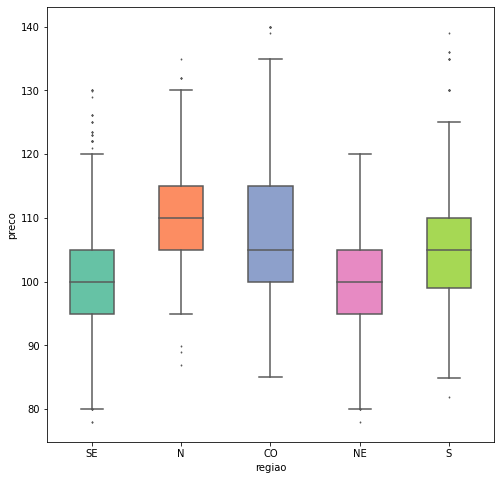

In [ ]:
# Pegando informações de preço e Regiao
preco_regiao = precogas.select(col('Regiao - Sigla').alias('regiao'), col('Valor de Venda').alias('preco')).toPandas()

# Importando as bibliotecas graficas
import seaborn as sns
import matplotlib.pyplot as plt

# Gerando o boxplot
plt.figure(figsize = (8,8))
sns.boxplot(data=preco_regiao, y = 'preco', x = 'regiao', 
            orient = 'v', palette = 'Set2', fliersize = 1, 
            width=0.5, saturation=1)
plt.show()

## **Comentários Finais**

A documentação oficial do PySpark é extremamente útil e pode ser acessada em:
https://spark.apache.org/docs/latest/api/python/reference/

Ainda existem outros sites que podem ajudar a encontrar exemplos e tirar dúvidas de métodos e funções como:

https://sparkbyexamples.com/pyspark/